## Data Source Description

- **Name of the dataset**: This dataset contains stock prices and trading volume information obtained from Yahoo Finance. Specifically, we have focused on the following stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google (GOOGL), Facebook (FB), Tesla (TSLA), Netflix (NFLX), and the S&P 500 ETF (SPY);
- **Obtain source**: The data is obtained through Yahoo Finance's public API and downloaded using the yfinance Python library;
- **Access**: Data can be accessed using the yfinance library through any device with an Internet connection. The yfinance library encapsulates Yahoo Finance's API, making data retrieval simpler and more convenient;
- **License**: The data provided by Yahoo Finance is mainly used for personal and non-commercial purposes. The yfinance library is released under the MIT license.


## Obtain Data

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Set date range
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = "2021-01-01"

# Dictionary to map tickers to company names
company_names = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'AMZN': 'Amazon',
    'GOOGL': 'Alphabet',
    'META': 'Meta Platforms',
    'TSLA': 'Tesla',
    'NFLX': 'Netflix',
    'SPY': 'S&P 500 ETF'
}

# define a function to obtain data
def fetch_stock_data(tickers):

    # Download the data
    data = yf.download(tickers, start=start_date, end=end_date)

    return data

# Stock code list
tickers = list(company_names.keys())

# Obtain data
stock_data = fetch_stock_data(tickers)

# Delete the 'close' column and use 'adj close' as the closing price
stock_data.drop(columns=['Close'], axis=1, inplace=True)
stock_data.rename(columns={'Adj Close': 'Close'}, inplace=True)


[*********************100%%**********************]  8 of 8 completed


In [3]:
# Set display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.width', 1000) #Prevent line breaks

# Convert dataframe to html
from IPython.display import display, HTML

def display_beautiful(df):
    display(HTML(df.to_html()))

## Data Display & Analysis

In [4]:
# Print the data head
display_beautiful(stock_data.head())


We have obtained daily stock market data for the Magnificent Seven and Nasdaq Composite Index from January 1, 2021 to present, including daily Open, Close, High, Low, and Volume data.

In [5]:
# Descriptive Statistics
descriptive_stats = stock_data.describe()

display_beautiful(descriptive_stats)

Through the analysis of the data, we have learned that the trading volume is usually high, indicating market activity. The trading volume of Tesla and Amazon is particularly prominent, which may indicate that investors are paying high attention to these stocks. The volatility of stock prices (reflected by standard deviation) varies significantly among different stocks, with Tesla and Netflix having higher volatility, which may be related to the uncertainty of their business models and market expectations. The data shows that the trading volume of the NASDAQ index is lower compared to individual stocks, which may be because it is a comprehensive index with more constituent stocks, and the impact of a single event on it is more dispersed.

## Data Visualization

### Plot 1 Trend chart
Create a trend chart to show the adjusted closing price trend of "Magnificent Seven" technology companies and the Nasdaq Composite Index. By observing curves of different colors, we can evaluate the changes in stock prices of each company over time and compare them with the overall performance of the Nasdaq index. If most stock price curves show a trend similar to the Nasdaq index, it indicates that the performance of these technology stocks is closely related to the overall market; If a company's stock price trend significantly deviates from the Nasdaq index, it may indicate that the company has been affected by specific market forces or internal events.

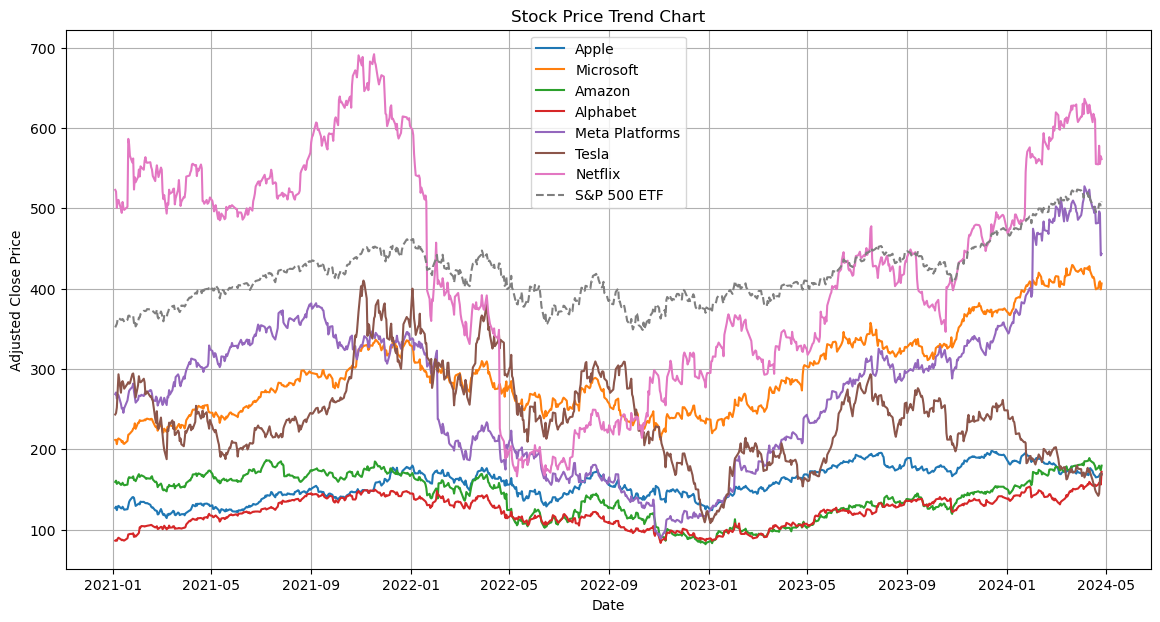

In [12]:
import matplotlib.pyplot as plt

# Define a Function to draw a stock price trend chart
def plot_trend_charts(data, start_date, end_date):
    # Set date filter
    filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

    # Create the chart
    plt.figure(figsize=(14, 7))  # set size
    for ticker in tickers[:-1]:
        plt.plot(filtered_data['Close'][ticker], label=company_names[ticker])

    # Add Nasdaq index to the same chart
    plt.plot(filtered_data['Close']['SPY'], label='S&P 500 ETF', linestyle='--')

    # Set chart titles and legends
    plt.title('Stock Price Trend Chart')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_trend_charts(stock_data, start_date, end_date)

#### Plot Result Analysis

From the graph, it can be seen that the stock price curves of each company exhibit unique fluctuation patterns in different time periods. During certain periods, the stock prices of some companies have significantly surpassed those of other companies or the SPY index, which may reflect the company's unique positive development or positive market expectations for its business prospects. In addition, we can also observe peaks or valleys in most curves at certain time points, which may be related to macroeconomic events or fluctuations in market sentiment. The entire chart displays a certain collective trend, with almost all stock prices exhibiting a common upward or downward trend at certain stages, which may indicate broader economic or policy factors affecting the entire industry.

#### Add date filter

Add an interactive tool for users to filter dates.

In [13]:
import ipywidgets as widgets
from ipywidgets import interact

# Create interactive controller
@interact
def interactive_plot(start_date=widgets.DatePicker(value=pd.to_datetime('2021-01-01')),
                     end_date=widgets.DatePicker(value=pd.to_datetime(datetime.now().strftime('%Y-%m-%d')))):
    if start_date and end_date:
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)
        plot_trend_charts(stock_data, start_date, end_date)
    else:
        print("Please select both start and end dates.")

interactive(children=(DatePicker(value=Timestamp('2021-01-01 00:00:00'), description='start_date', step=1), Da…

#### Add Company Filter

Add an interactive tool for users to filter companies.

In [14]:
# Re-define the function to make sure it can accept four parameters
def plot_trend_charts(data, start_date, end_date, selected_companies):
    # Set date filter
    filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

    # Create the chart
    plt.figure(figsize=(14, 7))  # Set size
    for ticker in selected_companies:
        plt.plot(filtered_data['Close'][ticker], label=company_names[ticker])

    # Set chart titles and legends
    plt.title('Stock Price Trend Chart')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive controller
@interact
def interactive_plot(start_date=widgets.DatePicker(value=pd.to_datetime('2021-01-01')),
                     end_date=widgets.DatePicker(value=pd.to_datetime(end_date)),
                     selected_companies=widgets.SelectMultiple(options=company_names.values(), value=['Apple', 'Microsoft'])):
    if start_date and end_date and selected_companies:
        # Convert company names back to tickers
        selected_tickers = [key for key, value in company_names.items() if value in selected_companies]
        plot_trend_charts(stock_data, pd.Timestamp(start_date), pd.Timestamp(end_date), selected_tickers)
    else:
        print("Please select both start and end dates and at least one company.")

interactive(children=(DatePicker(value=Timestamp('2021-01-01 00:00:00'), description='start_date', step=1), Da…

### Plot 2 Average transaction volume analysis chart

This bar chart can be used to display the average daily trading volume of a selected company over a certain time range. Through this approach, investors can quickly identify which stocks have high liquidity, which may mean that these stocks are easier to buy and sell and usually receive more market attention. A higher trading volume usually indicates higher liquidity, which is an important indicator for investors who want to quickly enter and exit the market. Trading volume can also serve as an indicator of market interest in a particular stock. An abnormally high trading volume may indicate significant news or event driven events. Stocks with high trading volume may have greater price fluctuations, which is a key factor for traders seeking high volatility trading opportunities.

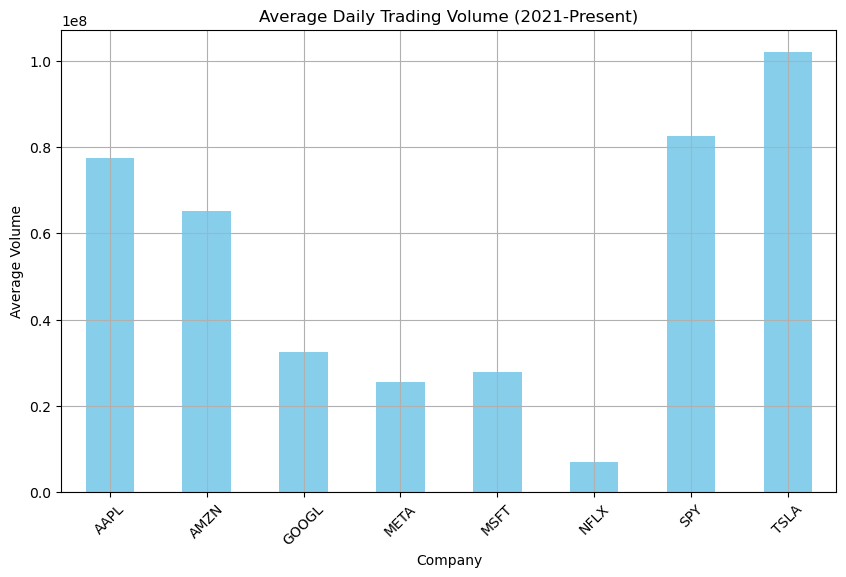

In [15]:
# Calculate the average daily trading volume
average_volumes = stock_data['Volume'].mean()

# Create Bar Chart
plt.figure(figsize=(10, 6))
average_volumes.plot(kind='bar', color='skyblue')
plt.title('Average Daily Trading Volume (2021-Present)')
plt.xlabel('Company')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Plot Result Analysis

From the graph, it can be seen that the average trading volume of Tesla (TSLA) and Apple (AAPL) is significantly higher than other companies, which may reflect their high activity in the stock market and the investor's interest in the stocks of these companies. The S&P 500 ETF (SPY), as a broad representative of the market, also exhibits high trading volume, which is in line with its characteristics as a market benchmark. At the same time, the average trading volume of Meta Platforms (META) and Netflix (NFLX) is relatively low, which may indicate that they have attracted less market attention compared to other tech giants, or there have been no significant news or event stimulating transactions during the selected time period.

#### Optimize the plot and add interactive tool

- Use different colors to display data from different companies;
- Add time filtering and company filtering functions.

In [16]:
import numpy as np

# Function to plot the average trading volume as a bar chart
def plot_average_volume(data, start_date, end_date, selected_companies):
    # Filter data by date and selected companies
    filtered_data = data[(data.index >= pd.Timestamp(start_date)) & (data.index <= pd.Timestamp(end_date))]

    # Calculate average volumes
    avg_volumes = filtered_data['Volume'][selected_companies].mean()

    # Create index for x-axis using company names instead of tickers
    company_labels = [company_names[ticker] for ticker in selected_companies]

    # Plotting
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_companies)))  # Generate a color map
    bars = plt.bar(company_labels, avg_volumes.values, color=colors)

    # Add labels and a dashed line to show the actual values
    for bar, value in zip(bars, avg_volumes.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.2f}',
                 ha='center', va='bottom', fontsize=9)
        plt.axhline(y=value, color='grey', linewidth=0.8, linestyle='--')

    plt.title('Average Daily Trading Volume')
    plt.xlabel('Company')
    plt.ylabel('Average Volume')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Create interactive controller
@interact
def interactive_volume_plot(start_date=widgets.DatePicker(value=pd.to_datetime('2021-01-01')),
                            end_date=widgets.DatePicker(value=pd.to_datetime(end_date)),
                            selected_companies=widgets.SelectMultiple(options=company_names.values(), value=['Apple', 'Microsoft'])):
    if start_date and end_date and selected_companies:
        # Convert company names back to tickers for internal data processing
        selected_tickers = [key for key, value in company_names.items() if value in selected_companies]
        plot_average_volume(stock_data, start_date, end_date, selected_tickers)
    else:
        print("Please select both start and end dates and at least one company.")


interactive(children=(DatePicker(value=Timestamp('2021-01-01 00:00:00'), description='start_date', step=1), Da…

### Plot 3 Box Plot

Purpose: A box plot provides a visual summary of the distribution of a dataset. It highlights the median, quartiles, and potential outliers within the data.

Use in Finance: For stock prices, it can show the range of closing prices over a period, identify stocks with high volatility, and detect outliers that might indicate unusual trading activity.


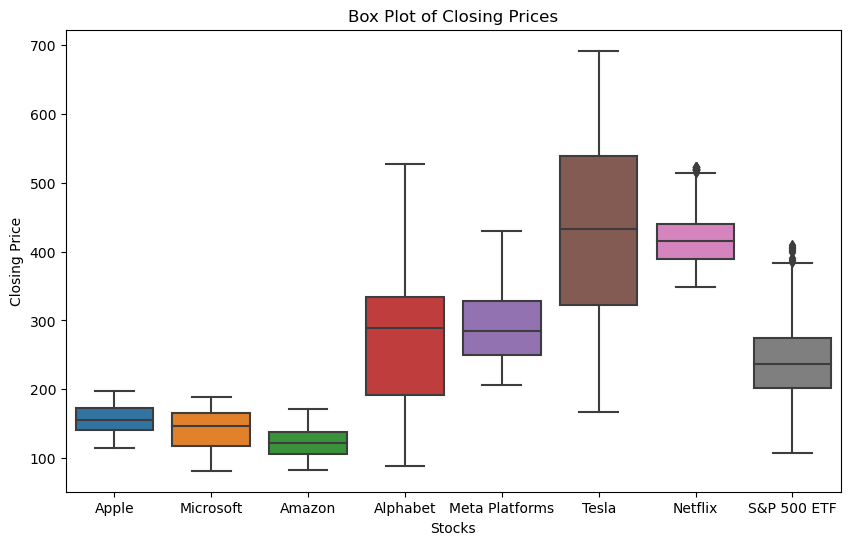

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot for the closing prices of all stocks
plt.figure(figsize=(10, 6))
sns.boxplot(data=stock_data['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Stocks')
plt.ylabel('Closing Price')
plt.xticks(ticks=range(len(tickers)), labels=[company_names[ticker] for ticker in tickers])
plt.show()

### Plot 4  Correlation Heatmap

Purpose: A correlation heatmap visualizes the correlation coefficients between pairs or groups of variables.

Use in Finance: This helps in understanding how different stocks move in relation to each other, which is crucial for diversification and risk management in a portfolio. High correlation coefficients indicate that stocks tend to move together, whereas low correlation coefficients suggest more diversification benefits.

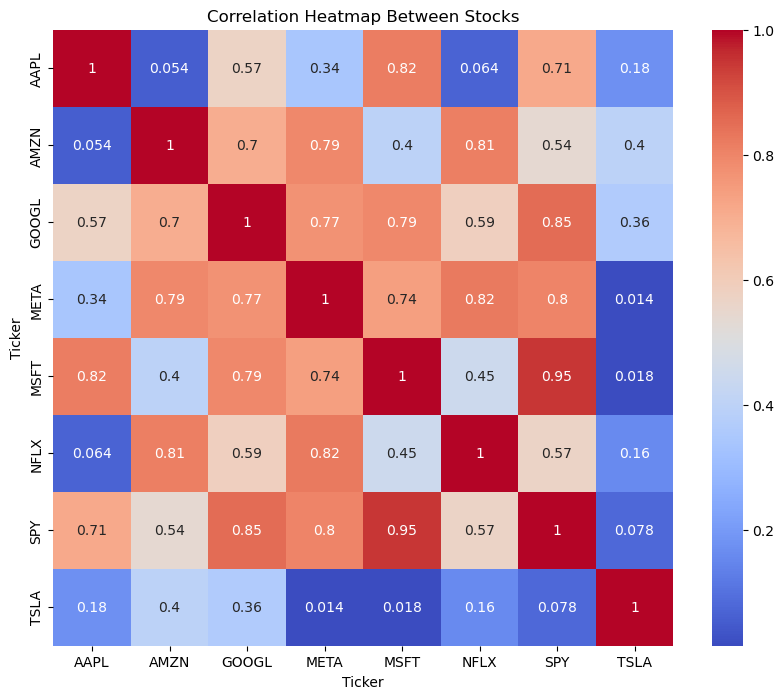

In [18]:
# Calculate correlations
correlations = stock_data['Close'].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Stocks')
plt.show()

### Plot 5 Moving Average Line Chart

Purpose: A moving average smooths out price data by creating a constantly updated average price. This helps in identifying trends over a period.

Use in Finance: The moving average is useful for detecting trends and potential turning points in stock prices, providing insights for entry and exit trading strategies.

Dropdown(description='Stock:', options=(('Apple', 'AAPL'), ('Microsoft', 'MSFT'), ('Amazon', 'AMZN'), ('Alphab…

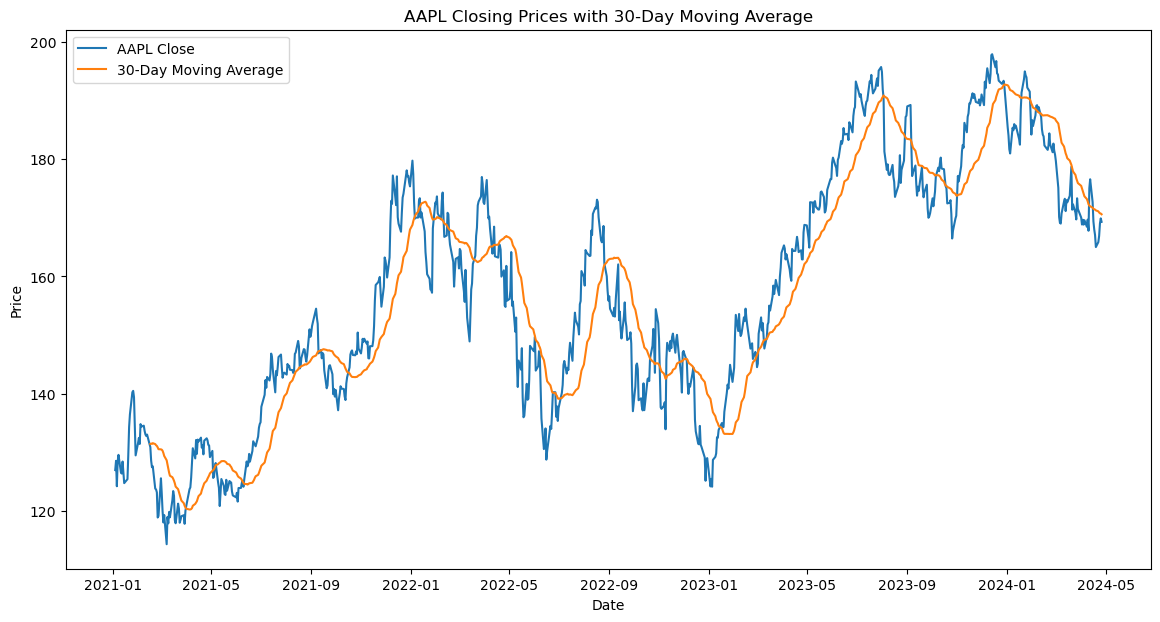

In [19]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def plot_moving_average(stock_data, ticker, window=30):
    ma_column_name = f'{window}_MA'
    stock_data['Close', ma_column_name] = stock_data['Close', ticker].rolling(window=window).mean()

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close', ticker], label=f'{ticker} Close')
    plt.plot(stock_data['Close', ma_column_name], label=f'{window}-Day Moving Average')
    plt.title(f'{ticker} Closing Prices with {window}-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Create a dropdown to select the ticker
ticker_dropdown = widgets.Dropdown(
    options=[(company_names[ticker], ticker) for ticker in tickers],
    value='AAPL', # Default value
    description='Stock:',
    disabled=False,
)

# Link the dropdown to the plotting function
def update_plot(change):
    clear_output(wait=True)  # Clear the output of the current cell including the plot
    display(ticker_dropdown)  # Redisplay the dropdown
    plot_moving_average(stock_data, change.new)  # Redraw the plot for the new ticker

ticker_dropdown.observe(update_plot, names='value')

# Display the widget
display(ticker_dropdown)
# Initial plot
plot_moving_average(stock_data, ticker_dropdown.value)


### Plot 6 Volume Weighted Average Price (VWAP)

Purpose: VWAP gives the average price a stock has traded throughout the day, based on volume and price. It is important because it provides traders with insight into both the trend and value of a stock.

Use in Finance: Traders use VWAP to ensure they are getting a favorable price on their trades relative to the volume-weighted price, which can be particularly useful for large orders.

Dropdown(description='Stock:', options=(('Apple', 'AAPL'), ('Microsoft', 'MSFT'), ('Amazon', 'AMZN'), ('Alphab…

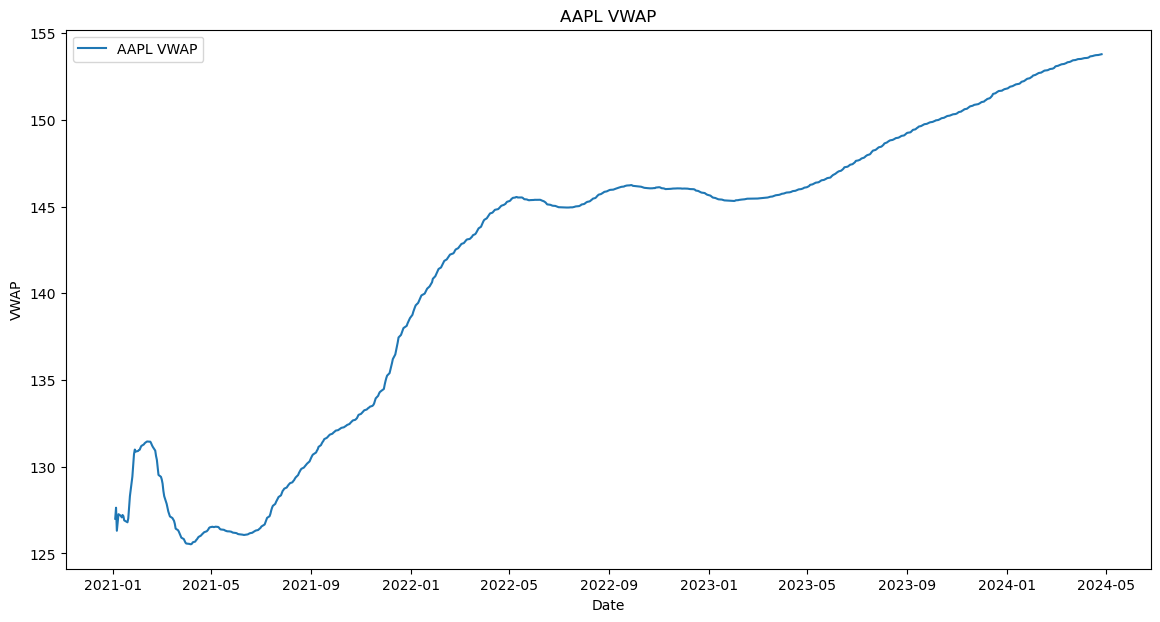

In [20]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def plot_vwap(stock_data, ticker):
    # Calculate VWAP
    vwap = (stock_data['Volume', ticker] * stock_data['Close', ticker]).cumsum() / stock_data['Volume', ticker].cumsum()

    # Plotting VWAP
    plt.figure(figsize=(14, 7))
    plt.plot(vwap, label=f'{ticker} VWAP')
    plt.title(f'{ticker} VWAP')
    plt.xlabel('Date')
    plt.ylabel('VWAP')
    plt.legend()
    plt.show()

# Create a dropdown to select the ticker
ticker_dropdown = widgets.Dropdown(
    options=[(company_names[ticker], ticker) for ticker in tickers],
    value='AAPL', # Default value
    description='Stock:',
    disabled=False,
)

# Link the dropdown to the plotting function
def update_plot(change):
    clear_output(wait=True)  # Clear the output of the current cell including the plot
    display(ticker_dropdown)  # Redisplay the dropdown
    plot_vwap(stock_data, change.new)  # Redraw the plot for the new ticker

ticker_dropdown.observe(update_plot, names='value')

# Display the widget
display(ticker_dropdown)
# Initial plot
plot_vwap(stock_data, ticker_dropdown.value)


### Plot 7 Daily Return Distribution Chart

Purpose: This chart shows the frequency distribution of daily returns of a stock, helping to understand its volatility and the normality of its return distribution.

Use in Finance: Analyzing the distribution helps in risk assessment, where wider distributions indicate higher volatility and potential for large price swings, impacting investment decisions.

Dropdown(description='Stock:', options=(('Apple', 'AAPL'), ('Microsoft', 'MSFT'), ('Amazon', 'AMZN'), ('Alphab…

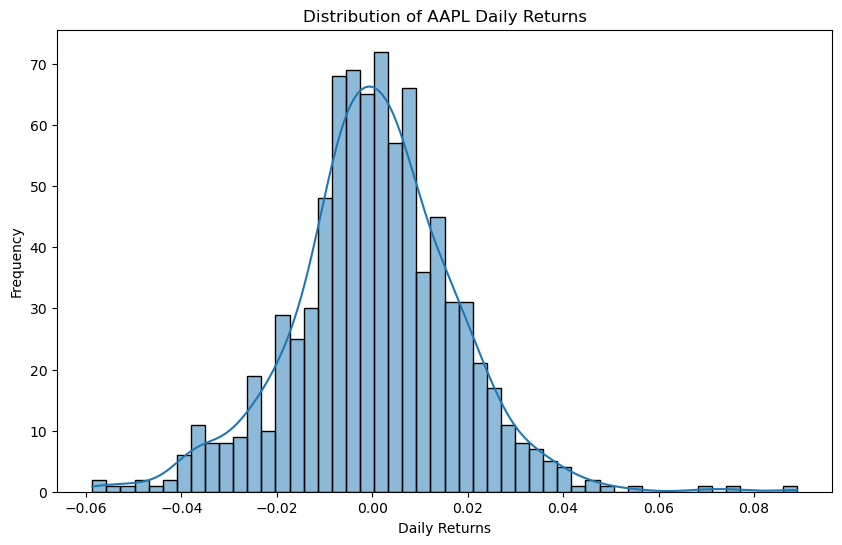

In [21]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

def plot_daily_returns(stock_data, ticker):
    # Calculate daily returns
    daily_returns = stock_data['Close', ticker].pct_change()

    # Plotting daily return distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(daily_returns.dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {ticker} Daily Returns')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.show()

# Create a dropdown to select the ticker
ticker_dropdown = widgets.Dropdown(
    options=[(company_names[ticker], ticker) for ticker in tickers],
    value='AAPL', # Default value
    description='Stock:',
    disabled=False,
)

# Link the dropdown to the plotting function
def update_plot(change):
    clear_output(wait=True)  # Clear the output of the current cell including the plot
    display(ticker_dropdown)  # Redisplay the dropdown
    plot_daily_returns(stock_data, change.new)  # Redraw the plot for the new ticker

ticker_dropdown.observe(update_plot, names='value')

# Display the widget
display(ticker_dropdown)
# Initial plot
plot_daily_returns(stock_data, ticker_dropdown.value)


### Plot 8 Accumulated Revenue Chart

Purpose: This chart accumulates revenue calculations over a period to show growth or decline.

Use in Finance: Although "revenue" here is an abstract notion (assuming revenue from sales at closing price multiplied by volume), this can illustrate trading volume and revenue potential over time, useful for analyzing market activity and liquidity trends.

Dropdown(description='Stock:', options=(('Apple', 'AAPL'), ('Microsoft', 'MSFT'), ('Amazon', 'AMZN'), ('Alphab…

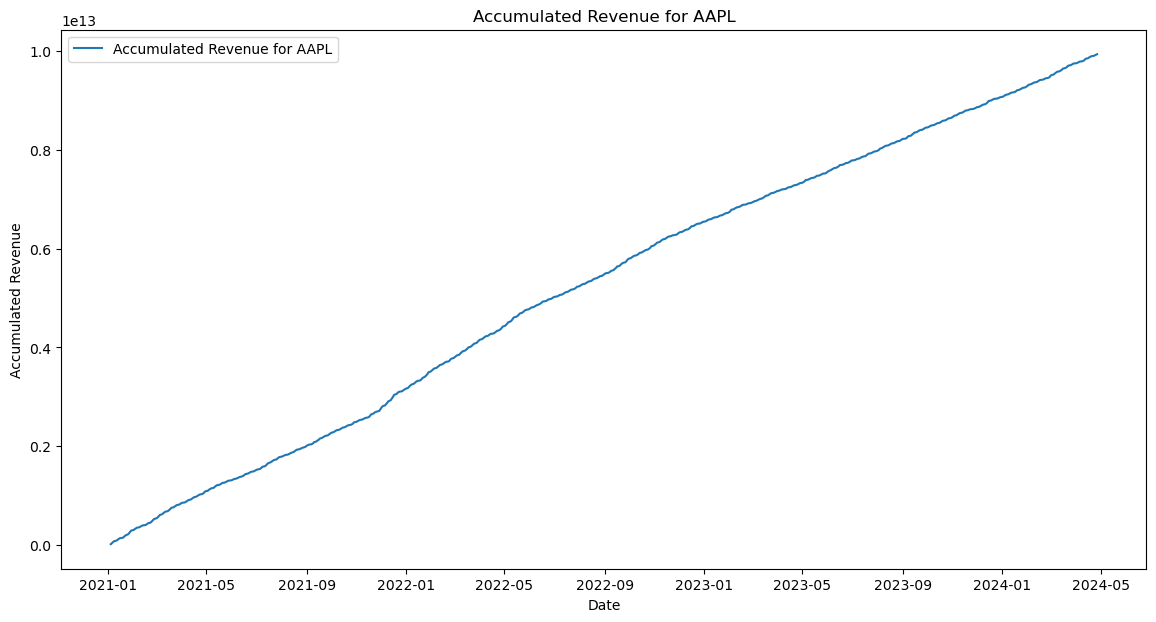

In [22]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def plot_accumulated_revenue(stock_data, ticker):
    # Calculate accumulated revenue
    accumulated_revenue = (stock_data['Close', ticker] * stock_data['Volume', ticker]).cumsum()

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(accumulated_revenue, label=f'Accumulated Revenue for {ticker}')
    plt.title(f'Accumulated Revenue for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Accumulated Revenue')
    plt.legend()
    plt.show()

# Create a dropdown to select the ticker
ticker_dropdown = widgets.Dropdown(
    options=[(company_names[ticker], ticker) for ticker in tickers],
    value='AAPL', # Default value
    description='Stock:',
    disabled=False,
)

# Link the dropdown to the plotting function
def update_plot(change):
    clear_output(wait=True)  # Clear the output of the current cell including the plot
    display(ticker_dropdown)  # Redisplay the dropdown
    plot_accumulated_revenue(stock_data, change.new)  # Redraw the plot for the new ticker

ticker_dropdown.observe(update_plot, names='value')

# Display the widget
display(ticker_dropdown)
# Initial plot
plot_accumulated_revenue(stock_data, ticker_dropdown.value)


### Plot 9 Interactive Scatter Plot

Purpose: An interactive scatter plot allows for dynamic visualization where users can explore specific data points by interacting with the plot.

Use in Finance: This can be used to investigate relationships between different variables (like closing price and volume), spot anomalies, and identify patterns across different time frames or conditions.

In [23]:
"""
Description: Draw a scatter plot of stock closing price and trading volume, supporting the selection of different dates and companies.
Filter: Supports selecting specific time periods and different companies based on date ranges.


"""
%matplotlib inline

import matplotlib.pyplot as plt

from IPython.display import display

scatter_info_label = widgets.Label(value='Nothing selected')

debug = widgets.Label(value="this is debug")
def plot_scatter_plot(data, start_date, end_date, selected_companies):
    """Creates scatter plot for selected_companies within a specific time period
    """
    data = data[(data.index >= pd.Timestamp(start_date))
                & (data.index <= pd.Timestamp(end_date))]
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_title('Closing Price vs. Trading Volume')
    ax.set_xlabel('Closing Price')
    ax.set_ylabel('Trading Volume')
    for ticker in selected_companies:
        ax.scatter(data['Close'][ticker], data['Volume'][ticker],
                    label=company_names[ticker], picker=True, pickradius=1e8)

    ax.legend()

    # def on_pick(event):
    #     scatter_info_label.value = 'Selected'
    #     display(debug)

    #     line = event.artist
    #     # xdata, ydata = line.get_data()
    #     ind = event.ind
    #     # scatter_info_label.value = str(ind)
    #     # print('selected point is:', xdata[ind], ydata[ind])

    # cid = fig.canvas.mpl_connect('pick_event', on_pick)
    plt.show()



# Create interactive controller
@interact
def interactive_scatter_plot(
        start_date=widgets.DatePicker(value=pd.to_datetime('2021-01-01')),
        end_date=widgets.DatePicker(value=pd.to_datetime(end_date)),
        selected_companies=widgets.SelectMultiple(
            options=company_names.values(), value=['Apple', 'Amazon'])):
    if start_date and end_date and selected_companies:
        # Convert company names back to tickers for internal data processing
        selected_tickers = [key
                            for key, value in company_names.items()
                            if value in selected_companies]
        plot_scatter_plot(stock_data, start_date, end_date, selected_tickers)
    else:
        print("Please select both start and end dates and at least one company.")


interactive(children=(DatePicker(value=Timestamp('2021-01-01 00:00:00'), description='start_date', step=1), Da…